In [1]:
import torch
import torch.nn as nn  
import torch.optim as optim 
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from helper_function import accuracy_fn, plot_decision_boundary


In [2]:
X,y = make_moons(n_samples=1000,noise=0.5,random_state=4)
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
#plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42)

y_train = y_train.squeeze()
y_test = y_test.squeeze()


In [99]:
class moon_model(nn.Module):
    def __init__(self,x) -> None:
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(2,x),
            nn.Sigmoid(),
            nn.Linear(x,x),
            nn.ReLU(),
            nn.Linear(x,x),
            nn.Tanh(),
            nn.Linear(x,1)
        )
        
    def forward(self,x):
        return self.network(x)

In [100]:
Model = moon_model(10)
loss_fcn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(params=Model.parameters(),lr=0.01)

In [5]:
X_train.dtype

torch.float32

In [108]:
epochs = 100
for epoch in range(epochs):
    
    Model.train()
    
    pred = Model(X_train).squeeze()
    pred_probs = torch.round(torch.sigmoid(pred))
    
    acc = accuracy_fn(y_train,pred_probs)
    loss = loss_fcn(pred,y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    with torch.inference_mode():
        # forward pass
        test = Model(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test))
        test_loss = loss_fcn(test,y_test)
        test_acc = accuracy_fn(y_test,test_pred)   
    print(f"Epoch: {epoch} |, loss : {loss:.4f} |, Acc: | {acc:.2f}% |, Test loss | {test_loss:.3f}, | test accuracy | {test_acc:.2f}% ")

Epoch: 0 |, loss : 0.3746 |, Acc: | 83.38% |, Test loss | 0.392, | test accuracy | 82.50% 
Epoch: 1 |, loss : 0.3746 |, Acc: | 83.38% |, Test loss | 0.392, | test accuracy | 82.50% 
Epoch: 2 |, loss : 0.3746 |, Acc: | 83.38% |, Test loss | 0.392, | test accuracy | 82.50% 
Epoch: 3 |, loss : 0.3746 |, Acc: | 83.38% |, Test loss | 0.392, | test accuracy | 82.50% 
Epoch: 4 |, loss : 0.3746 |, Acc: | 83.38% |, Test loss | 0.392, | test accuracy | 82.50% 
Epoch: 5 |, loss : 0.3746 |, Acc: | 83.38% |, Test loss | 0.392, | test accuracy | 82.50% 
Epoch: 6 |, loss : 0.3746 |, Acc: | 83.38% |, Test loss | 0.392, | test accuracy | 82.50% 
Epoch: 7 |, loss : 0.3746 |, Acc: | 83.38% |, Test loss | 0.392, | test accuracy | 82.50% 
Epoch: 8 |, loss : 0.3746 |, Acc: | 83.38% |, Test loss | 0.392, | test accuracy | 82.50% 
Epoch: 9 |, loss : 0.3746 |, Acc: | 83.38% |, Test loss | 0.392, | test accuracy | 82.50% 
Epoch: 10 |, loss : 0.3746 |, Acc: | 83.38% |, Test loss | 0.392, | test accuracy | 82.50%

In [67]:
pred_probs[:10] == y_train[:10]

tensor([ True,  True,  True,  True, False,  True,  True,  True,  True,  True])

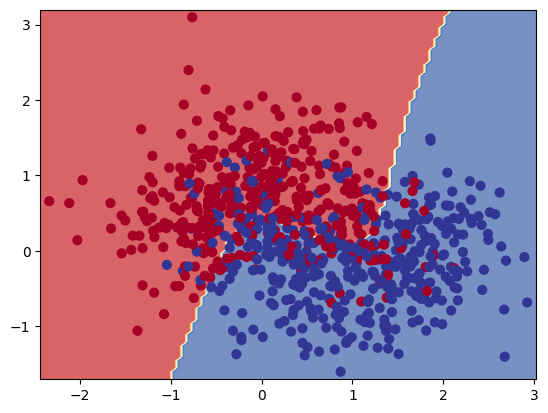

In [107]:
plot_decision_boundary(Model,X_train,y_train)